In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
import matplotlib.pyplot as plt
plt.close('all')

In [3]:
last_reported_sunday='2020-09-20'

In [4]:
df = pd.read_csv("turnstile_daily_counts_2020.csv",header=0,parse_dates=True, index_col='date', low_memory=False)

In [5]:
counts = df.groupby('date')['entries'].sum() # returns a Series

In [6]:
max_weekly_ridership = 34368521

In [7]:
# # date of ridership min and max
# counts.idxmin(),counts.min(), counts.idxmax(),counts.max()

In [8]:
# weekly rider totals -- peak week = 34368521
weekly_totals = counts.resample('W-MON').sum()

In [9]:
s_daily=counts.truncate(before=counts.idxmin(), after=pd.Timestamp(last_reported_sunday))

## daily entries from April 12 low

<AxesSubplot:xlabel='date'>

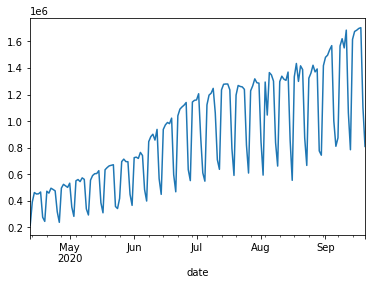

In [10]:
s_daily.plot()

## by week

<AxesSubplot:xlabel='date'>

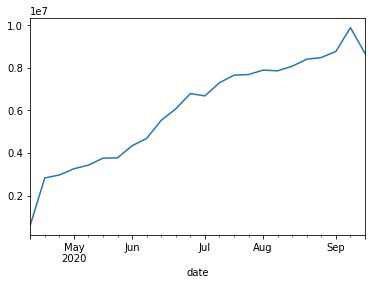

In [11]:
s_weekly = s_daily.resample('W-MON').sum()
s_weekly.plot()
# interpolated = s_weekly.interpolate(method='spline', order=2)
# interpolated.plot()

## 2020

In [12]:
# 2020
end_2020=pd.Timestamp('2020-12-31')
#end_2020=pd.Timestamp('2020-12-28')
s_weekly_2020 = s_weekly # make working copy
weekly_index2020 = pd.date_range(counts.idxmin(), end_2020, freq='W-MON') # create new index
s_weekly_2020 = s_weekly_2020.reindex(weekly_index2020) # reindex with new index
s_weekly_2020.interpolate() # interpolate
s_weekly_2020 = s_weekly_2020.append(pd.Series([max_weekly_ridership], index=[pd.Timestamp(end_2020)])) # populate final value
x2020 = s_weekly_2020.interpolate(method='linear') # interpolate


## 2021

In [13]:
# 2021
end_2021=pd.Timestamp('2021-12-31')
s_weekly_2021 = s_weekly # make working copy
weekly_index2021 = pd.date_range(counts.idxmin(), end_2021, freq='W-MON') # create new index
s_weekly_2021 = s_weekly_2021.reindex(weekly_index2021) # reindex with new index
s_weekly_2021.interpolate() # interpolate
s_weekly_2021 = s_weekly_2021.append(pd.Series([max_weekly_ridership], index=[pd.Timestamp(end_2021)])) # populate final value
x2021 = s_weekly_2021.interpolate(method='linear') # interpolate


## 2022

In [14]:
# 2022
end_2022=pd.Timestamp('2022-12-31')
s_weekly_2022 = s_weekly # make working copy
weekly_index2022 = pd.date_range(counts.idxmin(), end_2022, freq='W-MON') # create new index
s_weekly_2022 = s_weekly_2022.reindex(weekly_index2022) # reindex with new index
s_weekly_2022.interpolate() # interpolate
s_weekly_2022 = s_weekly_2022.append(pd.Series([max_weekly_ridership], index=[pd.Timestamp(end_2022)])) # populate final value
x2022 = s_weekly_2022.interpolate(method='linear') # interpolate


<AxesSubplot:>

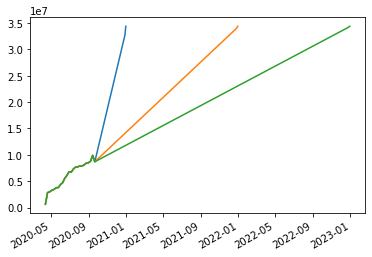

In [17]:
ax = x2020.plot() # plot
ax2 = x2021.plot(ax=ax)
x2022.plot(ax=ax2)